In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

from seaborn import pairplot 
from seaborn import boxplot
from seaborn import countplot
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

plt.style.use('belle2')


# Define Logistic regression class

In [3]:
def logistic_fun(X,y,theta, MSE = False):
    n = X.shape[0]

    X =np.column_stack([np.ones((n,1)),X])
    xth_y = (X.dot(theta))

    htheta = (1+ math.e**(-xth_y))**(-1)
    cost = -1/n * (np.log(htheta)*y+(1-y)*np.log(1-htheta)).sum()

    return htheta, cost



In [12]:

class Logistic_regression: 
    def __init__(self, learning_rate=0.01, iterations=1000, MSE = False, lambd = 0.1, penalty = 'l2',\
                 saturationplot=False):
        self.learning_rate, self.iterations, self.MSE, self.lambd, self.penalty, self.saturationplot = \
        learning_rate, iterations, MSE, lambd, penalty, saturationplot
        

    def logistic_fun(self,X,y,theta):
        n = X.shape[0]
        X =np.column_stack([np.ones((n,1)),X])
        xth_y = (X.dot(theta))

        htheta = (1+ math.e**(-xth_y))**(-1)
        cost = -1/n * (np.log(htheta)*y+(1-y)*np.log(1-htheta)).sum()

        if self.penalty == 'l2':
            vfuncsgn = np.vectorize(self.sgn)
            grad =    1/n *( (htheta-y).dot(X) + self.lambd * vfuncsgn(theta) )
        elif self.penalty == 'l1':
            grad =    1/n *( (htheta-y).dot(X) + 2 * self.lambd * theta )
        elif self.penalty == 'none':
            grad =    1/n *( (htheta-y).dot(X) )
        
        return htheta, cost, grad

    def fit(self, X, y):
        theta = np.full((X.shape[1]+1,),0.01)
        costlist = []
        nitlist = []
        
        for nit in range(self.iterations):
            htheta, cost, grad = self.logistic_fun(X, y, theta)
            theta = theta - self.learning_rate * grad 
            
            if nit % 10 == 0:
                nitlist.append(nit)
                costlist.append(cost)
        if self.saturationplot :
            plt.plot(np.array(nitlist),np.array(costlist),marker='o')
            plt.xlabel('number of iteration')
            plt.ylabel('Cost')
            plt.show()

        self.theta = theta
        
    def sgn(self, x):
        if x > 0:
            return 1
        elif x < 0:
            return -1
        elif x == 0:
            return 0



    def predict(self, X, continuous= False):
        n = X.shape[0]
        
        X =np.column_stack([np.ones((n,1)),X])
        xth_y = (X.dot(self.theta))
        htheta = (1+ math.e**(-xth_y))**(-1)
        
        if not continuous:
            htheta[htheta > 0.5] = 1
            htheta[htheta <= 0.5] = 0


        
        return htheta
    
    

# Credit card dataset
 Here https://r-data.pmagunia.com/dataset/r-dataset-package-islr-default
 
 On this R-data statistics page, you will find information about the Default data set which pertains to Credit Card Default Data. The Default data set is found in the ISLR R package. You can load the Default data set in R by issuing the following command at the console data("Default"). This will load the data into a variable called Default. If R says the Default data set is not found, you can try installing the package by issuing this command install.packages("ISLR") and then attempt to reload the data. If you need to download R, you can go to the R project website. You can download a CSV (comma separated values) version of the Default R data set. The size of this file is about 433,674 bytes.

In [6]:
df = pd.read_csv('dataset-63314.csv')
# creating number target variable
codes = {'Yes':0,'No':1}
df['target'] = df['default'].map(codes)
df['isstudent'] = df['student'].map(codes)
df.head(5)

,default,student,balance,income,target,isstudent
0,No,No,729.526495,44361.625074,1,1
1,No,Yes,817.180407,12106.134700,1,0
2,No,No,1073.549164,31767.138947,1,1
3,No,No,529.250605,35704.493935,1,1
4,No,No,785.655883,38463.495879,1,1


In [7]:
df = df.drop(columns=['default','student']).copy()


x = df[['balance','income','isstudent']].copy()
y  = df['target'].to_numpy()

scaler = StandardScaler()
scaler.fit(x)

x = pd.DataFrame(scaler.transform(x))
dfprime = pd.concat([df,x],axis=1)

## Fit with logistic refgression

### train test split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [15]:
clf = Logistic_regression( learning_rate=0.1, iterations=1000,penalty='none')
clf.fit(x_train, y_train)
clf.theta

array([ 4.07596033, -1.49872991, -0.0773642 , -0.05041211])

In [16]:

clf = Logistic_regression( learning_rate=0.1, iterations=1000, penalty='l1', lambd=0.1)
clf.fit(x_train, y_train)
clf.theta

array([ 4.07205006, -1.49648449, -0.07723319, -0.05031381])

In [17]:

clf = Logistic_regression( learning_rate=0.1, iterations=1000, penalty='l2', lambd=0.1)
clf.fit(x_train, y_train)
clf.theta

array([ 4.07525242, -1.49818831, -0.07705332, -0.05031721])

## accuracy

In [18]:
y_pred = clf.predict(x_train)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
accuracy_score(y_train, y_pred)

0.9703529411764706

In [19]:
y_pred = clf.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
accuracy_score(y_test, y_pred)

0.9633333333333334

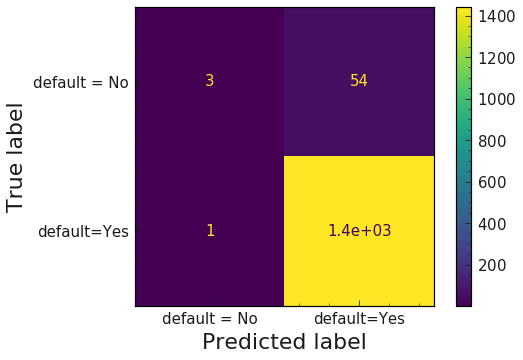

In [20]:
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
        
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['default = No','default=Yes'])
disp.plot()
plt.show()

In [21]:
clf.theta

array([ 4.07525242, -1.49818831, -0.07705332, -0.05031721])

# other dataset

In [69]:

#%% import dataset 
data = pd.read_csv("data.csv")
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)

# adding a arbitary variable to check effect of regularization
blah1 = np.random.rand(569,)
blah2 = np.random.rand(569,)
blah3 = np.random.rand(569,)

x.loc[:,'blah1'] = blah1
x.loc[:,'blah2'] = blah2
x.loc[:,'blah3'] = blah3


# %% normalization
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

## No penalty

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
clf = Logistic_regression( learning_rate=0.1, iterations=1000, penalty='none')
clf.fit(x_train, y_train)
print('theta',clf.theta)


y_pred = clf.predict(x_train,continuous=False)
print('train score',accuracy_score(y_train, y_pred))

y_pred = clf.predict(x_test,continuous=False)
print('test score',accuracy_score(y_test, y_pred))


theta [-3.85132522  0.73070469  0.29259722  0.79641899  0.91992376 -0.42990303
  0.66330736  1.42320437  1.77115536 -0.32529116 -0.98279655  0.66448989
 -0.50039619  0.56491152  0.57040687 -0.57908107 -0.16984314 -0.11673672
 -0.07606197 -0.53340333 -0.36967649  1.21705075  0.5792713   1.18762672
  1.12280176  0.13383114  0.84508242  1.13030604  1.79760983  0.36221056
  0.11840588]
train score 0.9440993788819876
test score 0.9418604651162791


## Lasso regression

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
clf = Logistic_regression( learning_rate=0.1, iterations=1000, penalty='l2', lambd=1)
clf.fit(x_train, y_train)

print('theta',clf.theta)


y_pred = clf.predict(x_train,continuous=False)
print('train score',accuracy_score(y_train, y_pred))

y_pred = clf.predict(x_test,continuous=False)
print('test score',accuracy_score(y_test, y_pred))


theta [-3.69352027e+00  6.54195180e-01  1.76014256e-01  7.20378206e-01
  8.26085950e-01 -2.31586581e-01  5.16691577e-01  1.30827992e+00
  1.68745311e+00 -1.25798429e-01 -8.43655284e-01  4.99525650e-01
 -3.31874949e-01  3.97532306e-01  4.04033519e-01 -4.26285551e-01
 -2.57894473e-02 -3.30744313e-04 -2.18176918e-04 -3.72383523e-01
 -1.97224748e-01  1.15496207e+00  4.57491449e-01  1.12112181e+00
  1.02696170e+00  6.23966845e-02  7.19016441e-01  1.01772124e+00
  1.75094565e+00  1.98287837e-01 -8.30782531e-05]
train score 0.9461697722567288
test score 0.9418604651162791


<div class="girk">
<span class="burk">Look at the coefficient value for lasso regularization, they got lower value.</span></div><i class="fa fa-lightbulb-o "></i>

## Ridge regression

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
clf = Logistic_regression( learning_rate=0.1, iterations=1000, penalty='l1', lambd=1)
clf.fit(x_train, y_train)
print('theta',clf.theta)

y_pred = clf.predict(x_train,continuous=False)
print('train score',accuracy_score(y_train, y_pred))

y_pred = clf.predict(x_test,continuous=False)
print('test score',accuracy_score(y_test, y_pred))


theta [-3.26082435  0.6164831   0.22949283  0.67241653  0.77521292 -0.37128197
  0.56494294  1.20556547  1.49509423 -0.2809865  -0.83040602  0.55481993
 -0.43101296  0.47243847  0.47662708 -0.49590294 -0.1354582  -0.09487492
 -0.06191043 -0.45384898 -0.30798929  1.0242505   0.46643771  1.00064085
  0.94424705  0.09951239  0.71700416  0.95869863  1.51854928  0.29599827
  0.09945183]
train score 0.9420289855072463
test score 0.9534883720930233


## cross validation to find $\lambda$

In [73]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
score1 = []
score2 = []
kf = KFold(n_splits=10,shuffle=True)

print('lambda   ','train score    ','test score')
for lambd in [0.0001,0.0005,0.001]:
    for train_index, test_index in kf.split(range(150)):

        X_train = np.take(x,train_index,axis=0)
        X_test = np.take(x,test_index,axis=0)
        y_train = np.take(y,train_index,axis=0)
        y_test = np.take(y,test_index,axis=0)

        mod_dt = clf = Logistic_regression( learning_rate=0.1, iterations=1000, penalty='l2', lambd=lambd)#KNeighborsClassifier(n_neighbors=2)
        mod_dt.fit(X_train,y_train)

        prediction=mod_dt.predict(X_test,continuous = False)
        score_test = metrics.accuracy_score(prediction,y_test)
        #print('The accuracy of the Decision Tree is',"{:.3f}".format(score_test))

        prediction=mod_dt.predict(X_train,continuous = False)
        score_train = metrics.accuracy_score(prediction,y_train)
        #print('The training data score is ',"{:.3f} \n".format(score_train))

        score1.append(score_train)
        score2.append(score_test)
    
    print(lambd,np.array(score1).mean(),np.array(score2).mean())


lambda    train score     test score
0.0001 0.9318518518518518 0.9200000000000002
0.0005 0.9337037037037037 0.9200000000000002
0.001 0.9340740740740741 0.92


 L1 regression

lambda | train score | test score
-------|----------------------|-----------------
0.0001 |0.9333333333333333 |0.9199999999999999
0.0003 |0.9337037037037037 |0.9233333333333335
0.009 |0.9335802469135802 |0.9222222222222223
0.01 |0.9335185185185185 |0.9216666666666666